# Titanic Machine Learning project by Ismael Martínez

Importing libraries and loading files

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
# m = DummyClassifier(strategy='most_frequent'); strategy='stratified'

In [4]:
# plt.style.use('seaborn')

## 1. Examining the data and Exercises

In [5]:
full_data = pd.read_csv('../data/train.csv')

In [6]:
full_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Examining the Nans:

In [9]:
full_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

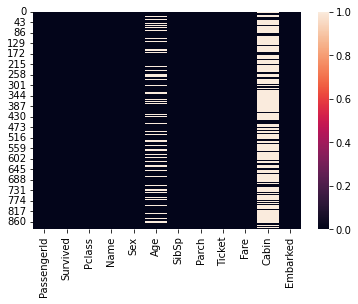

In [10]:
sns.heatmap(full_data.isna())

### 1.1 Surviving/non-surviving passengers

Information about surviving/ non-surviving:

In [11]:
full_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
surv = full_data['Survived'].value_counts()[1]
nonsurv = full_data['Survived'].value_counts()[0]

Drowning ratio:

In [446]:
nonsurv / (surv + nonsurv) * 100 

61.61616161616161

Subset of the passengers that survived:

In [13]:
by_sur_df = full_data.groupby('Survived')

In [40]:
by_sur_df.get_group(1).head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Subset of passengers that drowned:

In [15]:
by_sur_df.get_group(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Bar plot with panda:

<AxesSubplot:>

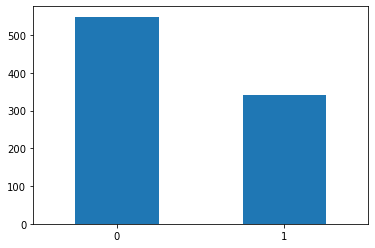

In [16]:
full_data['Survived'].value_counts().plot.bar(rot=0)

Plotting with Seaborn:

<AxesSubplot:xlabel='Survived', ylabel='count'>

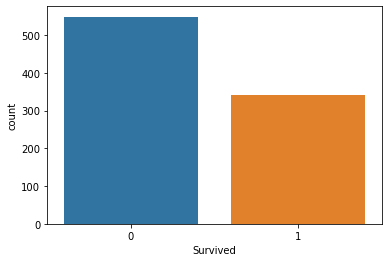

In [17]:
sns.countplot(data=full_data, x='Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

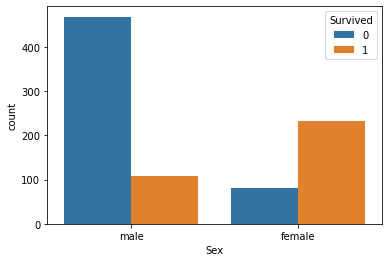

In [18]:
sns.countplot(data=full_data, x='Sex', hue='Survived')

### 1.2 Proportion of surviving passengers with regards to the total number of 1st class passengers:

First Class Passenger:

<AxesSubplot:xlabel='Pclass', ylabel='count'>

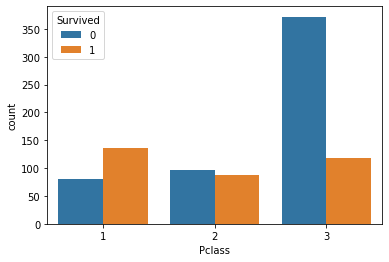

In [19]:
sns.countplot(data=full_data, x='Pclass', hue='Survived')

How many on First class?

In [20]:
firstcl = full_data['Pclass'].loc[full_data['Pclass']==1].count()
firstcl

216

How many on First class survived?

In [21]:
full_data['Survived'].loc[full_data['Pclass']==1].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [22]:
firstcl_sur = full_data['Pclass'].loc[full_data['Pclass']==1].loc[full_data['Survived']==1].count()
firstcl_sur

136

In [23]:
full_data['Survived'].loc[full_data['Pclass']==1]

1      1
3      1
6      0
11     1
23     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 216, dtype: int64

Proportion of surviving passengers in the 1st class:

In [24]:
firstcl_sur / firstcl

0.6296296296296297

### 1.3 Bar Plot with separate bars for male/ female passengers and 1st/2nd/3d class passengers

<AxesSubplot:xlabel='Sex', ylabel='count'>

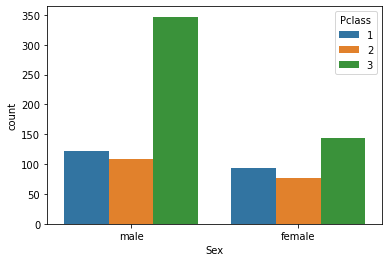

In [25]:
sns.countplot(data=full_data, x='Sex', hue='Pclass' )

<AxesSubplot:xlabel='Pclass', ylabel='count'>

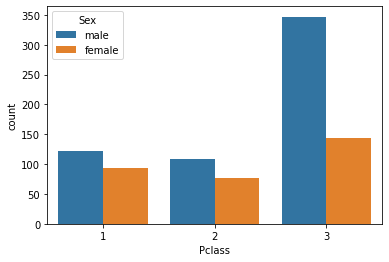

In [26]:
sns.countplot(data=full_data, x='Pclass', hue='Sex' )

### 1.4 Histogram showing age distributions of passengers among survivals and non-survivals

In [27]:
sur_df = full_data.loc[full_data['Survived']==1]
non_sur_df = full_data.loc[full_data['Survived']==0]

<AxesSubplot:xlabel='Age', ylabel='Count'>

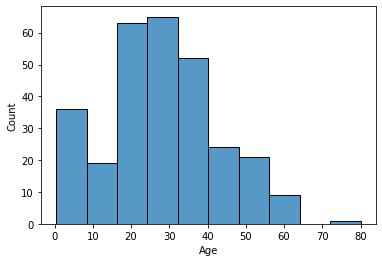

In [28]:
sns.histplot( data=sur_df, x='Age', bins=10 )

<AxesSubplot:xlabel='Age', ylabel='Count'>

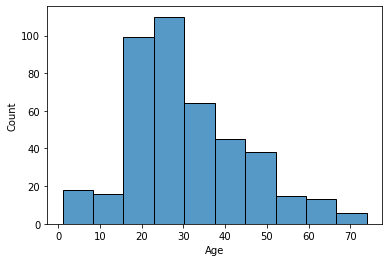

In [29]:
sns.histplot( data=non_sur_df, x='Age', bins=10 )

### 1.5 Average Age of the survived and the drowned

In [30]:
sur_df['Age'].mean()

28.343689655172415

In [31]:
non_sur_df['Age'].mean()

30.62617924528302

### 1.6 Replace missing age values by the mean:

In [32]:
full_data['Age'].isna().sum()

177

In [33]:
len (full_data)

891

In [34]:
df_age = full_data['Age'].fillna(full_data['Age'].mean(), inplace=False)

In [35]:
df_age.isna().sum()

0

In [36]:
full_data['Age'].isna().sum()

177

In [37]:
# Bonus: Imputation based on Title

In [45]:
full_data[full_data['Sex']=='male']['Name'].head(5) # Mr. / Master

0           Braund, Mr. Owen Harris
4          Allen, Mr. William Henry
5                  Moran, Mr. James
6           McCarthy, Mr. Timothy J
7    Palsson, Master. Gosta Leonard
Name: Name, dtype: object

In [47]:
full_data[full_data['Sex']=='female']['Name'].head(5) # Mrs. / Miss

1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

### 1.7 Table counting the number of surviving/dead passengers

In [48]:
class_df= full_data.groupby('Pclass')

In [49]:
class_df

In [50]:
class_df.groups

{1: [1, 3, 6, 11, 23, 27, 30, 31, 34, 35, 52, 54, 55, 61, 62, 64, 83, 88, 92, 96, 97, 102, 110, 118, 124, 136, 137, 139, 151, 155, 166, 168, 170, 174, 177, 185, 187, 194, 195, 209, 215, 218, 224, 230, 245, 248, 252, 256, 257, 258, 262, 263, 268, 269, 270, 273, 275, 284, 290, 291, 295, 297, 298, 299, 305, 306, 307, 309, 310, 311, 318, 319, 325, 329, 331, 332, 334, 336, 337, 339, 341, 351, 356, 366, 369, 370, 373, 375, 377, 380, 383, 390, 393, 412, 430, 434, 435, 438, 445, 447, ...], 2: [9, 15, 17, 20, 21, 33, 41, 43, 53, 56, 58, 66, 70, 72, 78, 84, 98, 99, 117, 120, 122, 123, 133, 134, 135, 144, 145, 148, 149, 150, 161, 178, 181, 183, 190, 191, 193, 199, 211, 213, 217, 219, 221, 226, 228, 232, 234, 236, 237, 238, 239, 242, 247, 249, 259, 265, 272, 277, 288, 292, 303, 308, 312, 314, 316, 317, 322, 323, 327, 340, 342, 343, 344, 345, 346, 357, 361, 385, 387, 389, 397, 398, 399, 405, 407, 413, 416, 417, 418, 426, 427, 432, 437, 439, 440, 443, 446, 450, 458, 463, ...], 3: [0, 2, 4, 5, 7, 8, 

In [51]:
class_df['Survived'].count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [ ]:
# Nans can be taken care of eventually by the feature engineering pipeline and column transformer

In [125]:
# Feature Engineering

In [470]:
df = full_data[['Pclass','Age','Sex','Survived']]

In [471]:
X = df[['Pclass','Age','Sex']]
y = df['Survived']

In [472]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=20)

In [473]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((668, 3), (223, 3), (668,), (223,))

In [474]:
age_imputer = SimpleImputer(strategy='median')

In [475]:
transformer = ColumnTransformer([
    ('imputed_age', age_imputer, ['Age']),
    ('do_nothing','passthrough',['Pclass']),
    ('onehot', OneHotEncoder(sparse=False,drop='if_binary',handle_unknown='error'),['Sex'])
])

In [476]:
x_train_fe = transformer.fit_transform(x_train)
x_test_fe = transformer.transform(x_test)

In [477]:
x_train_fe.shape, x_test_fe.shape, y_train.shape, y_test.shape

((668, 3), (223, 3), (668,), (223,))

In [478]:
x_train_fe

array([[40.,  1.,  1.],
       [ 3.,  3.,  1.],
       [15.,  3.,  0.],
       ...,
       [25.,  3.,  1.],
       [22.,  3.,  0.],
       [28.,  3.,  1.]])

In [327]:
# Pclass: OHE for LogReg

In [328]:
# Age: Binning, OHE for LogReg

In [329]:
# Sex: to number, OHE for LogReg

## 2. Machine Learning

#### Logistic Regression 1 feature

Prepare Data for ML:
- training: learning parameter values
- testing: test parameter values found in the training

In [339]:
# Pclass: feature order defined by transformer 
x_train = x_train_fe[:,1].reshape(-1,1)
x_test = x_test_fe[:,1].reshape(-1,1)

In [340]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((668, 1), (223, 1), (668,), (223,))

In [341]:
x_train[:5,0], x_test[:5,0]

(array([1, 3, 3, 2, 1], dtype=object), array([3, 2, 2, 3, 2], dtype=object))

In [342]:
# definition of sigmoid function. we are not going to use it explicitly
def sigmoid(w1, w0, x1):
    return 1/(1+np.exp(-(w1*x1+w0)))

In [343]:
pd.DataFrame(x_test).iloc[:,0].unique(), pd.DataFrame(x_train).iloc[:,0].unique()

(array([3, 2, 1], dtype=object), array([1, 3, 2], dtype=object))

In [344]:
m_lr = LogisticRegression(max_iter=1000)

In [345]:
m_lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [346]:
m_lr.score(x_train, y_train)

0.6721556886227545

In [347]:
m_lr.score(x_test, y_test)

0.6995515695067265

What are these? These are the parameters of the model.<br>
Applied linearly on the features and used in the sigmoid function to obtain probabilities.<br>
w0: Intercept is the bias, w1: Weight or coefficient array, same dimension as n of features

In [348]:
m_lr.intercept_, m_lr.coef_, m_lr.n_features_in_

(array([1.42232912]), array([[-0.82824476]]), 1)

In [349]:
w0 = m_lr.intercept_[0]
w1 = m_lr.coef_[0,0] 

In [350]:
w0, w1

(1.4223291236335902, -0.8282447621488357)

Let's visualize the model function used in this case: Incomplete

In [351]:
x = np.linspace(-10, 10, 201)

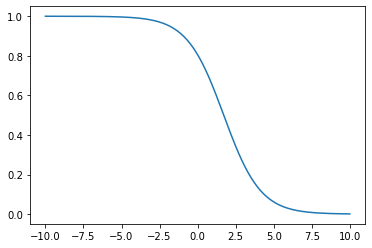

In [352]:
plt.plot(x, sigmoid(w1, w0, x))

This model will assign the following probabilities:
Class 1: sigmoid (m, b, 1)
Class 2: sigmoid (m, b, 2)

Calculate the probabilities for your data points belonging to the positive class (Survived=1)

In [353]:
sigmoid(w1,w0,1), sigmoid(w1,w0,2), sigmoid(w1,w0,3)

(0.6443017381478419, 0.44172592608565053, 0.2568500933143307)

In [361]:
pd.DataFrame(x_test).iloc[0:6,0]

0    3
1    2
2    2
3    3
4    2
5    1
Name: 0, dtype: object

In [363]:
m_lr.predict_proba(x_test).round(2)[0:6,:]

array([[0.74, 0.26],
       [0.56, 0.44],
       [0.56, 0.44],
       [0.74, 0.26],
       [0.56, 0.44],
       [0.36, 0.64]])

In [364]:
# Manual calculation and Logistic Regression bring the same results

Which where the thresholds in my calculation?

In [365]:
sigmoid(w1,w0,-w0/w1) #solve prob equation to x with prob=0.5

0.5

In [366]:
(-w0/w1).round(2)

1.72

Suppose you classify all points with a probability > 0.9 as positive.<br>
- How does the result of your prediction change?
- How does it change if you change the threshold to > 0.1?

This is a question about evaluating classifiers
evaluate ROC and AUC for different probabiliy thresholds [0,1]

In [367]:
m_lr.predict(x_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [368]:
y_pred=m_lr.predict(x_test)

### 2.2 Evaluating LogReg Model

In [369]:
# let's start with the confusion matrix

In [370]:
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[123,  19],
       [ 48,  33]], dtype=int64)

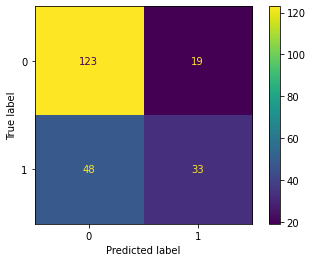

In [371]:
plot_confusion_matrix(m_lr,x_test, y_test,normalize=None)

### Performance Metrics

In [372]:
# accuracy: (tp+tn)/(tp+fp+tn+fn)=(40+109)/(40+19+109+55)=0.66816

In [373]:
accuracy_score(y_test, y_pred)

0.6995515695067265

In [374]:
precision_score(y_test, y_pred)

0.6346153846153846

In [375]:
recall_score(y_test, y_pred)

0.4074074074074074

In [376]:
f1_score(y_test,y_pred)

0.4962406015037593

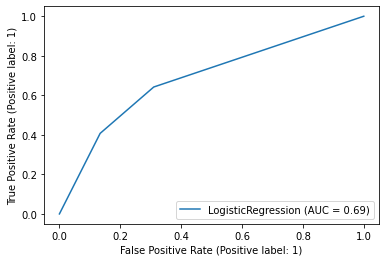

In [377]:
# plot ROC
plot_roc_curve(m_lr,x_test,y_test)

In [378]:
# AUC

In [379]:
probs = m_lr.predict_proba(x_test) 
probs.round(2)[:3,:]

array([[0.74, 0.26],
       [0.56, 0.44],
       [0.56, 0.44]])

In [380]:
fpr, tpr, threshold = roc_curve(y_test, probs[:,1]);

In [381]:
auc_score = auc(fpr, tpr)
print("Area under the curve = ",auc_score)

Area under the curve =  0.6862284820031298


Find out the threshhold: max(tpr-fpr)

In [382]:
max_index = np.argmax(tpr - fpr)
max_index

2

In [384]:
threshold[max_index] #optimal prob for classifying for the positive class

0.44172592608565053

Really bad

In [385]:
# Pclass still needs to be oh-encoded, scaled for LogReg

In [386]:
# other things to vary
# hyperparameter: penalty
# class weigth

### 2.2 Cross Validation

In [387]:
# train-test split was chosen for this project

### 2.3 Decision Tree Classifier with sklearn

Trial with one feature is not so meaningful

In [388]:
m_dt = DecisionTreeClassifier(max_depth=3)

In [389]:
m_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [390]:
y_pred = m_dt.predict(x_test)

In [391]:
m_dt.score(x_train,y_train)

0.6721556886227545

In [392]:
m_dt.score(x_test,y_test)

0.6995515695067265

In [393]:
m_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [394]:
y_pred = m_dt.predict(x_train)

[Text(200.88000000000002, 181.2, 'Pclass <= 2.5\ngini = 0.476\nsamples = 668\nvalue = [407, 261]\nclass = Died'),
 Text(133.92000000000002, 108.72, 'Pclass <= 1.5\ngini = 0.492\nsamples = 304\nvalue = [133, 171]\nclass = Survived'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.467\nsamples = 164\nvalue = [61, 103]\nclass = Survived'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.5\nsamples = 140\nvalue = [72, 68]\nclass = Died'),
 Text(267.84000000000003, 108.72, 'gini = 0.372\nsamples = 364\nvalue = [274, 90]\nclass = Died')]

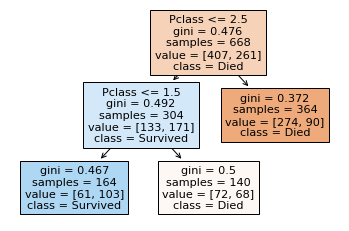

In [395]:
plt.figure()
plot_tree(m_dt, filled=True, feature_names=['Pclass'], class_names=['Died','Survived'])